In [1]:
import pandas as pd
import numpy as np
from nba_api.stats.endpoints import teamgamelog, boxscoreadvancedv2, leaguedashplayerstats, playercareerstats, playergamelog, commonplayerinfo, playerdashboardbygeneralsplits,leaguegamelog, leaguedashteamstats,teamdashboardbygeneralsplits
from nba_api.stats.static import players,teams
from fetch_player_data import *
from fetch_team_data import *
from player_features import *

## Gather Data and explore it

In [17]:
player_data = fetch_and_process_player_stats(season='2023-24')
team_data = get_teams_gamelogs(season='2023-24')
add_opponent_stats(team_data)
# add_team_off_rating(team_data)
add_pace_stats(team_data)

Processing team 1/30: Atlanta Hawks
Processing team 2/30: Boston Celtics
Processing team 3/30: Cleveland Cavaliers
Processing team 4/30: New Orleans Pelicans
Processing team 5/30: Chicago Bulls
Processing team 6/30: Dallas Mavericks
Processing team 7/30: Denver Nuggets
Processing team 8/30: Golden State Warriors
Processing team 9/30: Houston Rockets
Processing team 10/30: Los Angeles Clippers
Processing team 11/30: Los Angeles Lakers
Processing team 12/30: Miami Heat
Processing team 13/30: Milwaukee Bucks
Processing team 14/30: Minnesota Timberwolves
Processing team 15/30: Brooklyn Nets
Processing team 16/30: New York Knicks
Processing team 17/30: Orlando Magic
Processing team 18/30: Indiana Pacers
Processing team 19/30: Philadelphia 76ers
Processing team 20/30: Phoenix Suns
Processing team 21/30: Portland Trail Blazers
Processing team 22/30: Sacramento Kings
Processing team 23/30: San Antonio Spurs
Processing team 24/30: Oklahoma City Thunder
Processing team 25/30: Toronto Raptors
Pro

TEAM_ID     GAME_ID  TEAM_MIN  TEAM_FGM  TEAM_FGA  TEAM_FG_PCT  \
0     1610612737  0022301188       240        39        89        0.438   
1     1610612737  0022301178       240        40        90        0.444   
2     1610612737  0022301159       240        43        82        0.524   
3     1610612737  0022301147       290        45       113        0.398   
4     1610612737  0022301130       240        37        87        0.425   
...          ...         ...       ...       ...       ...          ...   
2455  1610612766  0022300133       240        47        88        0.534   
2456  1610612766  0022300122       240        45        90        0.500   
2457  1610612766  0022300101       240        47        96        0.490   
2458  1610612766  0022300077       240        33        88        0.375   
2459  1610612766  0022300063       240        43        86        0.500   

      TEAM_FG3M  TEAM_FG3A  TEAM_FG3_PCT  TEAM_FTM  ...  TEAM_TOV  TEAM_PF  \
0            12         36         0.333        25  ...        15       12   
1             9         30         0.300        17  ...        14       25   
2            18         40         0.450        10  ...        16       20   
3            10         46         0.217        11  ...        15       23   
4            12         37         0.324        24  ...        16       18   
...         ...        ...           ...       ...  ...       ...      ...   
2455          8         20         0.400        23  ...        13       20   
2456         11         27         0.407        18  ...        16       19   
2457          8         31         0.258        19  ...         9       23   
2458          7         28         0.250        26  ...        18       23   
2459         11         37         0.297        19  ...        19       21   

      TEAM_PTS  OPP_DEF_RATING  OPP_STL  OPP_BLK  OPP_REB  TEAM_PACE  \
0          115      107.597305     10.0      6.0     48.0     106.88   
1          106      100.000000      8.0     11.0     44.0     106.00   
2          114      116.279070     11.0      2.0     33.0      98.04   
3          111       94.742233      8.0      3.0     46.0     117.16   
4          110      105.001909      9.0      7.0     47.0     104.76   
...        ...             ...      ...      ...      ...        ...   
2455       125      126.109766      7.0      5.0     36.0      99.12   
2456       119      116.666667     10.0      2.0     38.0     102.00   
2457       121      114.366730      4.0      8.0     46.0     105.80   
2458        99       90.032739      7.0      6.0     53.0     109.96   
2459       116      111.068556     12.0      1.0     42.0     104.44   

      GAME_PACE  OPP_PACE  
0        106.64    106.40  
1        102.38     98.76  
2         97.36     96.68  
3        113.70    110.24  
4        104.40    104.04  
...         ...       ...  
2455     101.08    103.04  
2456     103.06    104.12  
2457     104.94    104.08  
2458     109.98    110.00  
2459     105.98    107.52  

[2460 rows x 28 columns]

In [3]:
add_team_off_rating(team_data)
team_data.columns

Index(['TEAM_ID', 'GAME_ID', 'TEAM_MIN', 'TEAM_FGM', 'TEAM_FGA', 'TEAM_FG_PCT',
       'TEAM_FG3M', 'TEAM_FG3A', 'TEAM_FG3_PCT', 'TEAM_FTM', 'TEAM_FTA',
       'TEAM_FT_PCT', 'TEAM_OREB', 'TEAM_DREB', 'TEAM_REB', 'TEAM_AST',
       'TEAM_STL', 'TEAM_BLK', 'TEAM_TOV', 'TEAM_PF', 'TEAM_PTS',
       'OPP_DEF_RATING', 'OPP_STL', 'OPP_BLK', 'OPP_REB', 'TEAM_PACE',
       'GAME_PACE', 'OPP_PACE', 'TEAM_OFF_RATING'],
      dtype='object')

In [4]:
team_data

,TEAM_ID,GAME_ID,TEAM_MIN,TEAM_FGM,TEAM_FGA,TEAM_FG_PCT,TEAM_FG3M,TEAM_FG3A,TEAM_FG3_PCT,TEAM_FTM,...,TEAM_PF,TEAM_PTS,OPP_DEF_RATING,OPP_STL,OPP_BLK,OPP_REB,TEAM_PACE,GAME_PACE,OPP_PACE,TEAM_OFF_RATING
0,1610612737,0022301188,240,39,89,0.438,12,36,0.333,25,...,12,115,107.597305,10.0,6.0,48.0,106.88,106.64,106.40,107.597305
1,1610612737,0022301178,240,40,90,0.444,9,30,0.300,17,...,25,106,100.000000,8.0,11.0,44.0,106.00,102.38,98.76,100.000000
2,1610612737,0022301159,240,43,82,0.524,18,40,0.450,10,...,20,114,116.279070,11.0,2.0,33.0,98.04,97.36,96.68,116.279070
3,1610612737,0022301147,290,45,113,0.398,10,46,0.217,11,...,23,111,94.742233,8.0,3.0,46.0,117.16,113.70,110.24,94.742233
4,1610612737,0022301130,240,37,87,0.425,12,37,0.324,24,...,18,110,105.001909,9.0,7.0,47.0,104.76,104.40,104.04,105.001909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,1610612766,0022300133,240,47,88,0.534,8,20,0.400,23,...,20,125,126.109766,7.0,5.0,36.0,99.12,101.08,103.04,126.109766
2456,1610612766,0022300122,240,45,90,0.500,11,27,0.407,18,...,19,119,116.666667,10.0,2.0,38.0,102.00,103.06,104.12,116.666667
2457,1610612766,0022300101,240,47,96,0.490,8,31,0.258,19,...,23,121,114.366730,4.0,8.0,46.0,105.80,104.94,104.08,114.366730
2458,1610612766,0022300077,240,33,88,0.375,7,28,0.250,26,...,23,99,90.032739,7.0,6.0,53.0,109.96,109.98,110.00,90.032739


## Train Models

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def train_PTS_predict_rf(df, target_col='PTS', season_weights=None, test_size=0.2, random_state=42):
    if season_weights is None:
        season_weights = {
            '2023-24': 1.0,
            '2022-23': 0.75,
            '2021-22': 0.5,
            '2020-21': 0.25
        }
    
    # Add a 'weights' column based on the 'Season'
    df['weights'] = df['Season'].map(season_weights)

    # Features for model training
    features = ['PLAYER_ID','MIN', 'FGA', 'FG3A', 'FTA', 'TOV', 'PLUS_MINUS', 'USG_PCT', 'TS_PCT', 'EFG_PCT',
                'OFF_RATING', 'PTS_LAST_5', 'HomeGame', 'DAYS_OF_REST', 'TEAM_PACE', 'GAME_PACE',
                'OPP_PACE', 'OPP_DRTG', 'OPP_STL', 'OPP_BLK', 'OPP_REB', 'PER', 'BACK_TO_BACK',
                'PLAYER_HOME_AVG_PTS', 'PLAYER_AWAY_AVG_PTS', 'USG_PCT_LAST_5', 'USG_DRTG_INTERACTION']
    
    X = df[features]
    y = df[target_col]
    sample_weights = df['weights']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
        X, y, sample_weights, test_size=test_size, random_state=random_state)
    
    model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train, sample_weight=weights_train)

    y_pred = model.predict(X_test)

    return model, y_pred, y_test

model, y_pred, y_test = train_PTS_predict_rf(combined_season_df)




In [4]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# Evaluate the model's performance on validation data
val_mae = mean_absolute_error(y_test, y_pred)
val_rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Validation Mean Absolute Error (MAE): {val_mae.round(4)}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse.round(4)}")
print(f"R-squared: {r2}")

Validation Mean Absolute Error (MAE): 0.0724
Validation Root Mean Squared Error (RMSE): 0.2947
R-squared: 0.9988602609207693


c:\Users\alexg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importances.head(10))

NameError: name 'X' is not defined

In [30]:
# player_name = 'James Harden'
# player_data = player_data_2022_23[player_data_2022_23['NAME'] == player_name]
# player_data = player_data.sort_values('GAME_DATE', ascending=False)

# features = ['PTS_LAST_5','FTA','FGA', 'DAYS_OF_REST', 'HomeGame', 'OFF_RATING', 'USG_PCT', 'TS_PCT','AST','REB']

# X_player = player_data[features].iloc[0:1]

# # Make predictions
# predicted_points = rf_model.predict(X_player)

# print(f"Predicted points for {player_name}: {predicted_points[0]}")

Predicted points for James Harden: 14.0


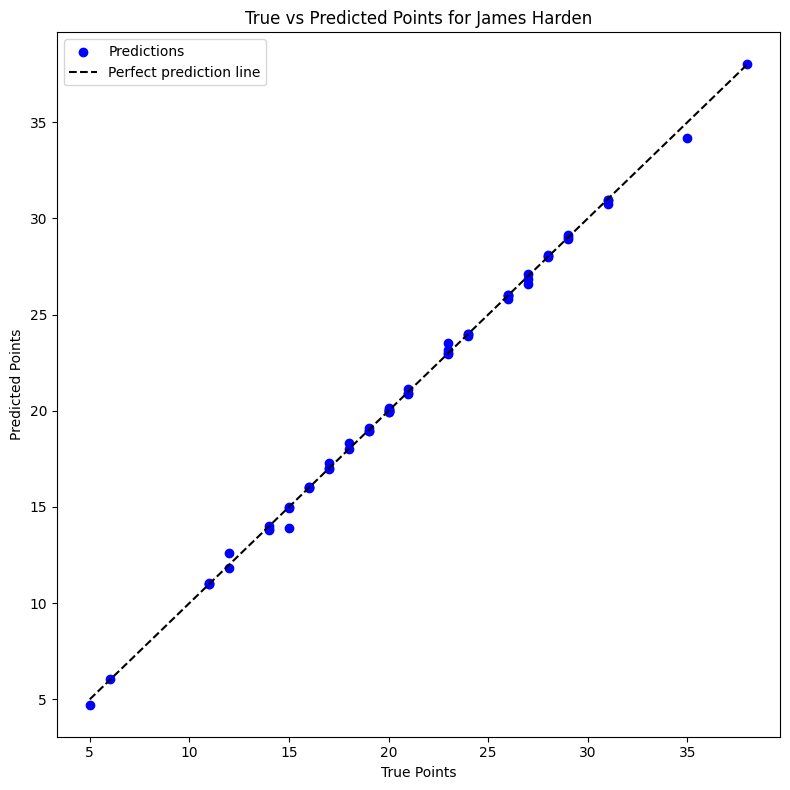

In [32]:
import matplotlib.pyplot as plt

# Assuming y_true contains the actual points from the dataset (could be test set or player data)
# And pred contains the predicted points for those games from your model
# For example, if you are comparing a series of games, you would have arrays of true and predicted points

# Let's assume y_true is a list of actual points and pred is a list of predicted points
# Replace y_true and pred with your actual and predicted values arrays
y_test = player_data['PTS']  # Actual points (replace with actual data)
pred = rf_model.predict(player_data[features])  # Predicted points (replace with your prediction logic)

# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', label="Perfect prediction line")

# Set the labels and title
plt.xlabel('True Points')
plt.ylabel('Predicted Points')
plt.title(f"True vs Predicted Points for {player_name}")

# Add a legend
plt.legend()

# Ensure layout is tight to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()
